<a href="https://colab.research.google.com/github/snvssk/data298A/blob/saidev/SolarModel_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
#from tensorflow.keras.losses import MeanSquaredLogarithmicError


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [2]:
nsrdb = pd.read_csv('/content/all_combined_city.csv')

In [3]:
nsrdb

,Year,Month,Day,Hour,GHI,Cloud_Type,Dew_Point,Solar_Zenith_Angle,Surface_Albedo,Wind_Speed,Precipitable_Water,Wind_Direction,Relative_Humidity,Temperature,Pressure
0,2016,1,1,0.0,0,1,0.0,165.44,0.099,1.0,0.705,72.0,87.98,4.0,1020
1,2016,1,1,0.5,0,1,0.0,165.13,0.099,1.0,0.714,72.0,87.97,3.0,1020
2,2016,1,1,1.0,0,1,0.0,162.29,0.099,1.0,0.723,73.1,87.91,3.0,1020
3,2016,1,1,1.5,0,1,0.0,157.90,0.099,1.0,0.730,73.1,87.91,3.0,1020
4,2016,1,1,2.0,0,1,0.0,152.70,0.099,1.0,0.737,65.4,87.69,3.0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526171,2020,12,31,21.5,0,7,7.5,142.70,0.110,1.1,0.900,323.0,83.23,10.2,1006
526172,2020,12,31,22.0,0,7,7.8,148.49,0.110,1.4,1.000,294.0,88.11,9.7,1006
526173,2020,12,31,22.5,0,7,7.8,154.04,0.110,1.6,1.000,298.0,91.73,9.1,1006
526174,2020,12,31,23.0,0,7,8.5,159.12,0.110,1.7,1.000,302.0,99.42,8.6,1006


In [4]:
target = nsrdb['GHI']#keeping only target(ghi) data here
target

0         0
1         0
2         0
3         0
4         0
         ..
526171    0
526172    0
526173    0
526174    0
526175    0
Name: GHI, Length: 526176, dtype: int64

In [5]:
input= nsrdb.drop(['GHI'], axis=1)
input

,Year,Month,Day,Hour,Cloud_Type,Dew_Point,Solar_Zenith_Angle,Surface_Albedo,Wind_Speed,Precipitable_Water,Wind_Direction,Relative_Humidity,Temperature,Pressure
0,2016,1,1,0.0,1,0.0,165.44,0.099,1.0,0.705,72.0,87.98,4.0,1020
1,2016,1,1,0.5,1,0.0,165.13,0.099,1.0,0.714,72.0,87.97,3.0,1020
2,2016,1,1,1.0,1,0.0,162.29,0.099,1.0,0.723,73.1,87.91,3.0,1020
3,2016,1,1,1.5,1,0.0,157.90,0.099,1.0,0.730,73.1,87.91,3.0,1020
4,2016,1,1,2.0,1,0.0,152.70,0.099,1.0,0.737,65.4,87.69,3.0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526171,2020,12,31,21.5,7,7.5,142.70,0.110,1.1,0.900,323.0,83.23,10.2,1006
526172,2020,12,31,22.0,7,7.8,148.49,0.110,1.4,1.000,294.0,88.11,9.7,1006
526173,2020,12,31,22.5,7,7.8,154.04,0.110,1.6,1.000,298.0,91.73,9.1,1006
526174,2020,12,31,23.0,7,8.5,159.12,0.110,1.7,1.000,302.0,99.42,8.6,1006


In [6]:
from sklearn.preprocessing import StandardScaler
#Normalize the dataset
sc = StandardScaler()
input_normalized = sc.fit_transform(input)

In [7]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(input_normalized, target, test_size=0.3, random_state=42)

In [8]:
x_test

array([[-1.41344013, -0.73091262, -0.65153714, ...,  1.05346687,
        -0.53879346, -0.47471954],
       [ 0.70672007, -0.15107009,  0.2573068 , ...,  0.50793746,
        -0.22311258,  0.38098041],
       [ 0.70672007,  1.29853625, -1.56038109, ..., -1.56120834,
        -0.67171172,  0.50322327],
       ...,
       [ 0.        ,  0.71869371,  0.14370131, ...,  0.35888336,
         0.05933873, -1.5749052 ],
       [-1.41344013,  0.42877245, -0.53793165, ...,  1.10630161,
        -0.53879346, -0.47471954],
       [ 0.70672007, -0.44099135, -1.4467756 , ...,  0.59599535,
        -0.62186737, -1.69714805]])

In [9]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_text shape",y_test.shape)

x_train shape (368323, 14)
x_test shape (157853, 14)
y_train shape (368323,)
y_text shape (157853,)


In [11]:
"""hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()"""

In [34]:
# loss function
#model.compile(optimizer='sgd', loss=tf.keras.losses.MeanSquaredError())


In [ ]:
"""mse = MeanSquaredLogarithmicError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)"""

In [35]:
# train the model
"""history = model.fit(
    x_train, 
    y_train, 
    epochs=10, 
    batch_size=64,
    validation_split=0.2
)"""

'history = model.fit(\n    x_train, \n    y_train, \n    epochs=10, \n    batch_size=64,\n    validation_split=0.2\n)'

# https://github.com/tpt5cu/solarIrradiancePredictor/blob/master/Neural_Net.ipynb

In [10]:
from tensorflow.keras.optimizers import Adam
import pandas as pd
import os
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns
from random import randint
from glob import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [11]:
keras.backend.clear_session()
tf.keras.backend.clear_session()

In [12]:
keras.backend.clear_session()
tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph

<function tensorflow.python.framework.ops.reset_default_graph()>

In [13]:
model = keras.Sequential()
model.add(layers.Dense(300, activation="relu"))
model.add(layers.Dense(200, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(1, activation='relu'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               4500      
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 91,151
Trainable params: 91,151
Non-traina

In [14]:
#Compile and train
model.compile(optimizer=Adam(lr=0.0001), 
              loss='mse',
              metrics=['mae',keras.metrics.RootMeanSquaredError()])

history = model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


5756/5756 [==============================] - 25s 4ms/step - loss: 9053.4609 - mae: 38.4833 - root_mean_squared_error: 95.1497
Epoch 2/100
5756/5756 [==============================] - 25s 4ms/step - loss: 1913.1875 - mae: 19.4457 - root_mean_squared_error: 43.7400
Epoch 3/100
5756/5756 [==============================] - 26s 5ms/step - loss: 1616.3071 - mae: 17.2505 - root_mean_squared_error: 40.2033
Epoch 4/100
5756/5756 [==============================] - 27s 5ms/step - loss: 1470.6328 - mae: 16.1549 - root_mean_squared_error: 38.3488
Epoch 5/100
5756/5756 [==============================] - 26s 5ms/step - loss: 1389.5897 - mae: 15.5218 - root_mean_squared_error: 37.2772
Epoch 6/100
5756/5756 [==============================] - 25s 4ms/step - loss: 1341.4570 - mae: 15.1441 - root_mean_squared_error: 36.6259
Epoch 7/100
5756/5756 [==============================] - 25s 4ms/step - loss: 1301.3799 - mae: 14.8598 - root_mean_squared_error: 36.0746
Epoch 8/100
5756/5756 [=======================

## Training MAE 10.50 w/m2, RMSE 26.05 w/m2 after 100 epoch

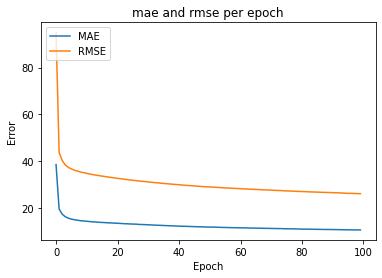

In [16]:
plt.plot(history.history['mae'])
plt.plot(history.history['root_mean_squared_error'])
plt.title('mae and rmse per epoch')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['MAE', 'RMSE'], loc='upper left')
plt.show()

In [20]:
y_pred=model.predict(x_test)

In [37]:
"""i = randint(0,8760)
print("index is ",i)
print("Actual ",y_test[i]," ","Predicted ", y_pred[i])"""

'i = randint(0,8760)\nprint("index is ",i)\nprint("Actual ",y_test[i]," ","Predicted ", y_pred[i])'

In [21]:
from sklearn.metrics import r2_score 
 
R_square = r2_score(y_test, y_pred) 
print('Coefficient of Determination R2', R_square) 

Coefficient of Determination R2 0.9906618743732911


In [22]:
from sklearn import metrics
#MAE
print("Model MAE", metrics.mean_absolute_error(y_test, y_pred))

#MSE
print("Model MSE", metrics.mean_squared_error(y_test, y_pred))

#RMSE
print("Model RMSE",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Model MAE 11.584059892078198
Model MSE 858.1696308175053
Model RMSE 29.294532438963852


In [2]:
"""delta_y = y_test - y_pred
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5)
plt.show()"""

"delta_y = y_test - y_pred\nsns.set_style('whitegrid')\nsns.kdeplot(np.array(delta_y), bw=0.5)\nplt.show()"